In [328]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.1.0


In [329]:
path = r"C:\Users\chan\Desktop\dataset"
file_ = "\\agaricus-lepiota.data"

In [330]:
mush = pd.read_csv(path + file_, header=None)
mush

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [331]:
print(mush.shape)
mush.info()

(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
0     8124 non-null object
1     8124 non-null object
2     8124 non-null object
3     8124 non-null object
4     8124 non-null object
5     8124 non-null object
6     8124 non-null object
7     8124 non-null object
8     8124 non-null object
9     8124 non-null object
10    8124 non-null object
11    8124 non-null object
12    8124 non-null object
13    8124 non-null object
14    8124 non-null object
15    8124 non-null object
16    8124 non-null object
17    8124 non-null object
18    8124 non-null object
19    8124 non-null object
20    8124 non-null object
21    8124 non-null object
22    8124 non-null object
dtypes: object(23)
memory usage: 1.4+ MB


In [332]:
for col in mush.columns:
    print(mush[col].value_counts(), '\n')

e    4208
p    3916
Name: 0, dtype: int64 

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: 1, dtype: int64 

y    3244
s    2556
f    2320
g       4
Name: 2, dtype: int64 

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: 3, dtype: int64 

f    4748
t    3376
Name: 4, dtype: int64 

n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: 5, dtype: int64 

f    7914
a     210
Name: 6, dtype: int64 

c    6812
w    1312
Name: 7, dtype: int64 

b    5612
n    2512
Name: 8, dtype: int64 

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: 9, dtype: int64 

t    4608
e    3516
Name: 10, dtype: int64 

b    3776
?    2480
e    1120
c     556
r     192
Name: 11, dtype: int64 

s    5176
k    2372
f     552
y      24
Name: 12, dtype: int64 

s    4936
k    2304
f     600
y     284
Name: 13, dtype: int64 



In [333]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for col in mush.columns:
    mush[col] = labelencoder.fit_transform(mush[col])

In [336]:
mush

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [339]:
mush.drop([16], axis=1, inplace=True, errors='ignore')

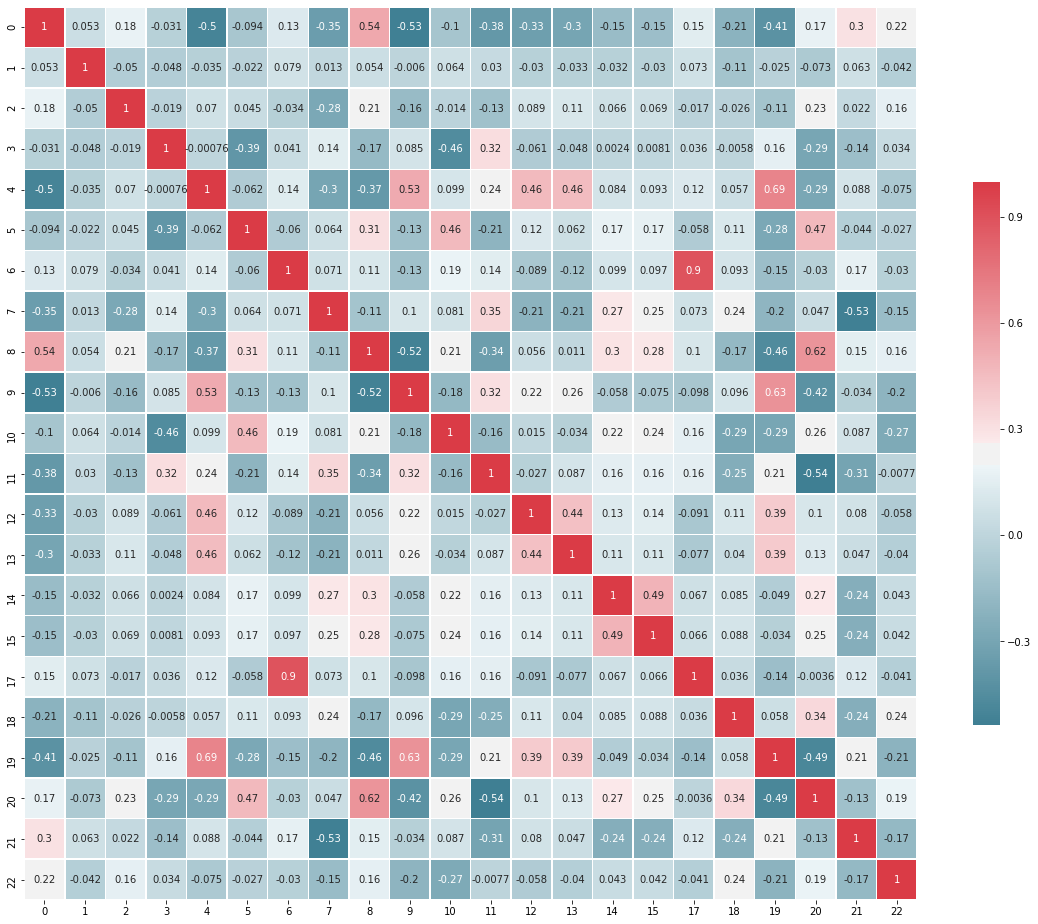

In [341]:
corr = mush.corr()

cmap = sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=cmap, annot=True, square=True,
           linewidths=0.5, cbar_kws={'shrink':0.5})

In [342]:
xdata = mush.iloc[:,1:]
ydata = mush.iloc[:,[0]]

In [343]:
xdata

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [364]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [365]:
from sklearn.model_selection import train_test_split

xTrn, xTst, yTrn, yTst = train_test_split(xdata, ydata, test_size=0.3)

In [366]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [367]:
xTrn = scaler.fit_transform(xTrn)
xTst = scaler.transform(xTst)

모델 생성

In [368]:
xTrn.shape

(5686, 21)

In [369]:
W = tf.Variable(tf.random_normal(shape=[xdata.shape[1],1]))
b = tf.Variable(tf.random_normal(shape=[1]))
X = tf.placeholder(dtype=tf.float32, shape=[None, xdata.shape[1]])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [370]:
hf = tf.matmul(X, W) + b
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=hf, labels=Y))

In [371]:
lr = 0.1
# batch_size=32
iter_num = 10000
boundry = 0.5

In [372]:
opt = tf.train.GradientDescentOptimizer(lr)
train = opt.minimize(loss)

In [373]:
prediction = tf.cast(hf>boundry, dtype=tf.float32)
correct = tf.cast(tf.equal(prediction, Y), dtype=tf.float32)
accuracy = tf.reduce_mean(correct)

In [374]:
loss_trace, val_loss, train_acc, test_acc = [], [], [], []

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(iter_num):
    _, lv, t_acc = sess.run([train, loss, accuracy], feed_dict={X:xTrn,Y:yTrn})
    v_loss, v_acc = sess.run([loss, accuracy], feed_dict={X:xTst,Y:yTst})
    loss_trace.append(lv)
    train_acc.append(t_acc)
    test_acc.append(v_acc)
    val_loss.append(v_loss)

    if epoch % 500 == 0:
        print(f'epoch : {epoch} \t loss : {lv} \t acc : {t_acc}, \t v_acc : {v_acc}')

epoch : 0 	 loss : 3.246530771255493 	 acc : 0.3255364000797272, 	 v_acc : 0.3211648762226105
epoch : 500 	 loss : 0.22715072333812714 	 acc : 0.9115371108055115, 	 v_acc : 0.9200164079666138
epoch : 1000 	 loss : 0.19528862833976746 	 acc : 0.9266619682312012, 	 v_acc : 0.9290401935577393
epoch : 1500 	 loss : 0.18386028707027435 	 acc : 0.931938111782074, 	 v_acc : 0.9323215484619141
epoch : 2000 	 loss : 0.17766955494880676 	 acc : 0.9344002604484558, 	 v_acc : 0.9351927638053894
epoch : 2500 	 loss : 0.1736670732498169 	 acc : 0.9377418160438538, 	 v_acc : 0.937243640422821
epoch : 3000 	 loss : 0.17076538503170013 	 acc : 0.9389728903770447, 	 v_acc : 0.938474178314209
epoch : 3500 	 loss : 0.1684931218624115 	 acc : 0.9391487836837769, 	 v_acc : 0.9409351944923401
epoch : 4000 	 loss : 0.16661952435970306 	 acc : 0.939324676990509, 	 v_acc : 0.9417555332183838
epoch : 4500 	 loss : 0.1650194376707077 	 acc : 0.9398522973060608, 	 v_acc : 0.9409351944923401
epoch : 5000 	 loss : 0

<Figure size 504x504 with 0 Axes>

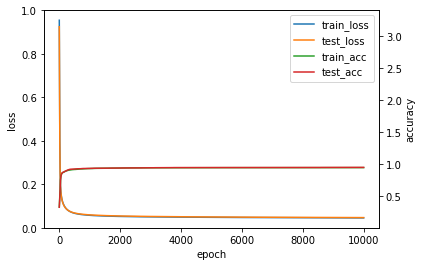

In [388]:
plt.figure(figsize=(7,7))
fig, ax = plt.subplots()
ax2 = ax.twinx()
x = range(len(loss_trace))
sns.lineplot(x=x, y=loss_trace, label='train_loss')
sns.lineplot(x=x, y=val_loss, label='test_loss')

sns.lineplot(x=x, y=train_acc, label='train_acc', ax=ax2)
sns.lineplot(x=x, y=np.array(test_acc).reshape(-1), label='test_acc', ax=ax2)

ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax2.set_ylabel('accuracy')
plt.show()

In [376]:
pred = sess.run([prediction], feed_dict={X:xTst, Y:yTst})
pred

[array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [0.]], dtype=float32)]

In [377]:
((pred[0] == np.array(yTst)).sum())/len(yTst)

0.9450369155045119

In [378]:
pred = sess.run([prediction], feed_dict={X:xTrn, Y:yTrn})

In [379]:
((pred[0] == np.array(yTrn)).sum()) / len(yTrn)

0.9412592332043616

In [380]:
acc = sess.run([accuracy], feed_dict={X:xTrn, Y:yTrn})
acc

[0.9412592]

## Tensorflow를 사용한 KNN

In [360]:
from sklearn.model_selection import train_test_split

xTrn, xTst, yTrn, yTst = train_test_split(np.array(xdata), np.array(ydata).reshape(-1,1), test_size=0.3)

In [363]:
Xtr = tf.placeholder(dtype=tf.float32, shape=[None, xdata.shape[1]])
Xte = tf.placeholder(dtype=tf.float32, shape=[xdata.shape[1]])

distance = tf.reduce_sum(tf.abs(tf.subtract(Xtr, Xte)), reduction_indices=1)
prediction = tf.argmin(distance,0)
accuracy = 0

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(len(xTst)):
    pred = sess.run(prediction, 
                   feed_dict={Xtr:xTrn, Xte:xTst[i,:]})
    print(f'Test : {i} \t Prediction & True Class : {yTrn[pred]} {yTst[i]}')
    
    if yTrn[pred]==yTst[i]:
        accuracy += 1./len(xTst)
print(accuracy)

Test : 0 	 Prediction & True Class : [1]  [1]
Test : 1 	 Prediction & True Class : [1]  [1]
Test : 2 	 Prediction & True Class : [1]  [1]
Test : 3 	 Prediction & True Class : [0]  [0]
Test : 4 	 Prediction & True Class : [0]  [0]
Test : 5 	 Prediction & True Class : [1]  [1]
Test : 6 	 Prediction & True Class : [0]  [0]
Test : 7 	 Prediction & True Class : [0]  [0]
Test : 8 	 Prediction & True Class : [1]  [1]
Test : 9 	 Prediction & True Class : [1]  [1]
Test : 10 	 Prediction & True Class : [1]  [1]
Test : 11 	 Prediction & True Class : [0]  [0]
Test : 12 	 Prediction & True Class : [1]  [1]
Test : 13 	 Prediction & True Class : [0]  [0]
Test : 14 	 Prediction & True Class : [1]  [1]
Test : 15 	 Prediction & True Class : [1]  [1]
Test : 16 	 Prediction & True Class : [1]  [1]
Test : 17 	 Prediction & True Class : [0]  [0]
Test : 18 	 Prediction & True Class : [0]  [0]
Test : 19 	 Prediction & True Class : [0]  [0]
Test : 20 	 Prediction & True Class : [1]  [1]
Test : 21 	 Prediction 

Test : 232 	 Prediction & True Class : [1]  [1]
Test : 233 	 Prediction & True Class : [0]  [0]
Test : 234 	 Prediction & True Class : [1]  [1]
Test : 235 	 Prediction & True Class : [1]  [1]
Test : 236 	 Prediction & True Class : [1]  [1]
Test : 237 	 Prediction & True Class : [0]  [0]
Test : 238 	 Prediction & True Class : [1]  [1]
Test : 239 	 Prediction & True Class : [0]  [0]
Test : 240 	 Prediction & True Class : [0]  [0]
Test : 241 	 Prediction & True Class : [0]  [0]
Test : 242 	 Prediction & True Class : [1]  [1]
Test : 243 	 Prediction & True Class : [0]  [0]
Test : 244 	 Prediction & True Class : [0]  [0]
Test : 245 	 Prediction & True Class : [0]  [0]
Test : 246 	 Prediction & True Class : [0]  [0]
Test : 247 	 Prediction & True Class : [1]  [1]
Test : 248 	 Prediction & True Class : [0]  [0]
Test : 249 	 Prediction & True Class : [0]  [0]
Test : 250 	 Prediction & True Class : [0]  [0]
Test : 251 	 Prediction & True Class : [0]  [0]
Test : 252 	 Prediction & True Class : [

Test : 471 	 Prediction & True Class : [1]  [1]
Test : 472 	 Prediction & True Class : [0]  [0]
Test : 473 	 Prediction & True Class : [1]  [1]
Test : 474 	 Prediction & True Class : [0]  [0]
Test : 475 	 Prediction & True Class : [1]  [1]
Test : 476 	 Prediction & True Class : [0]  [0]
Test : 477 	 Prediction & True Class : [0]  [0]
Test : 478 	 Prediction & True Class : [1]  [1]
Test : 479 	 Prediction & True Class : [0]  [0]
Test : 480 	 Prediction & True Class : [0]  [0]
Test : 481 	 Prediction & True Class : [1]  [1]
Test : 482 	 Prediction & True Class : [0]  [0]
Test : 483 	 Prediction & True Class : [0]  [0]
Test : 484 	 Prediction & True Class : [1]  [1]
Test : 485 	 Prediction & True Class : [1]  [1]
Test : 486 	 Prediction & True Class : [0]  [0]
Test : 487 	 Prediction & True Class : [1]  [1]
Test : 488 	 Prediction & True Class : [1]  [1]
Test : 489 	 Prediction & True Class : [1]  [1]
Test : 490 	 Prediction & True Class : [1]  [1]
Test : 491 	 Prediction & True Class : [

Test : 649 	 Prediction & True Class : [0]  [0]
Test : 650 	 Prediction & True Class : [1]  [1]
Test : 651 	 Prediction & True Class : [1]  [1]
Test : 652 	 Prediction & True Class : [0]  [0]
Test : 653 	 Prediction & True Class : [1]  [1]
Test : 654 	 Prediction & True Class : [0]  [0]
Test : 655 	 Prediction & True Class : [1]  [1]
Test : 656 	 Prediction & True Class : [0]  [0]
Test : 657 	 Prediction & True Class : [0]  [0]
Test : 658 	 Prediction & True Class : [1]  [1]
Test : 659 	 Prediction & True Class : [1]  [1]
Test : 660 	 Prediction & True Class : [0]  [0]
Test : 661 	 Prediction & True Class : [0]  [0]
Test : 662 	 Prediction & True Class : [1]  [1]
Test : 663 	 Prediction & True Class : [1]  [1]
Test : 664 	 Prediction & True Class : [0]  [0]
Test : 665 	 Prediction & True Class : [1]  [1]
Test : 666 	 Prediction & True Class : [1]  [1]
Test : 667 	 Prediction & True Class : [1]  [1]
Test : 668 	 Prediction & True Class : [1]  [1]
Test : 669 	 Prediction & True Class : [

Test : 821 	 Prediction & True Class : [1]  [1]
Test : 822 	 Prediction & True Class : [0]  [0]
Test : 823 	 Prediction & True Class : [1]  [1]
Test : 824 	 Prediction & True Class : [1]  [1]
Test : 825 	 Prediction & True Class : [0]  [0]
Test : 826 	 Prediction & True Class : [1]  [1]
Test : 827 	 Prediction & True Class : [1]  [1]
Test : 828 	 Prediction & True Class : [1]  [1]
Test : 829 	 Prediction & True Class : [0]  [0]
Test : 830 	 Prediction & True Class : [1]  [1]
Test : 831 	 Prediction & True Class : [1]  [1]
Test : 832 	 Prediction & True Class : [0]  [0]
Test : 833 	 Prediction & True Class : [0]  [0]
Test : 834 	 Prediction & True Class : [0]  [0]
Test : 835 	 Prediction & True Class : [0]  [0]
Test : 836 	 Prediction & True Class : [0]  [0]
Test : 837 	 Prediction & True Class : [0]  [0]
Test : 838 	 Prediction & True Class : [1]  [1]
Test : 839 	 Prediction & True Class : [1]  [1]
Test : 840 	 Prediction & True Class : [1]  [1]
Test : 841 	 Prediction & True Class : [

Test : 993 	 Prediction & True Class : [1]  [1]
Test : 994 	 Prediction & True Class : [1]  [1]
Test : 995 	 Prediction & True Class : [1]  [1]
Test : 996 	 Prediction & True Class : [1]  [1]
Test : 997 	 Prediction & True Class : [1]  [1]
Test : 998 	 Prediction & True Class : [0]  [0]
Test : 999 	 Prediction & True Class : [0]  [0]
Test : 1000 	 Prediction & True Class : [0]  [0]
Test : 1001 	 Prediction & True Class : [0]  [0]
Test : 1002 	 Prediction & True Class : [0]  [0]
Test : 1003 	 Prediction & True Class : [0]  [0]
Test : 1004 	 Prediction & True Class : [1]  [1]
Test : 1005 	 Prediction & True Class : [1]  [1]
Test : 1006 	 Prediction & True Class : [1]  [1]
Test : 1007 	 Prediction & True Class : [1]  [1]
Test : 1008 	 Prediction & True Class : [1]  [1]
Test : 1009 	 Prediction & True Class : [0]  [0]
Test : 1010 	 Prediction & True Class : [1]  [1]
Test : 1011 	 Prediction & True Class : [1]  [1]
Test : 1012 	 Prediction & True Class : [0]  [0]
Test : 1013 	 Prediction & 

Test : 1162 	 Prediction & True Class : [0]  [0]
Test : 1163 	 Prediction & True Class : [0]  [0]
Test : 1164 	 Prediction & True Class : [0]  [0]
Test : 1165 	 Prediction & True Class : [1]  [1]
Test : 1166 	 Prediction & True Class : [1]  [1]
Test : 1167 	 Prediction & True Class : [0]  [0]
Test : 1168 	 Prediction & True Class : [0]  [0]
Test : 1169 	 Prediction & True Class : [1]  [1]
Test : 1170 	 Prediction & True Class : [0]  [0]
Test : 1171 	 Prediction & True Class : [0]  [0]
Test : 1172 	 Prediction & True Class : [0]  [0]
Test : 1173 	 Prediction & True Class : [0]  [0]
Test : 1174 	 Prediction & True Class : [0]  [0]
Test : 1175 	 Prediction & True Class : [0]  [0]
Test : 1176 	 Prediction & True Class : [0]  [0]
Test : 1177 	 Prediction & True Class : [1]  [1]
Test : 1178 	 Prediction & True Class : [0]  [0]
Test : 1179 	 Prediction & True Class : [1]  [1]
Test : 1180 	 Prediction & True Class : [1]  [1]
Test : 1181 	 Prediction & True Class : [1]  [1]
Test : 1182 	 Predic

Test : 1357 	 Prediction & True Class : [0]  [0]
Test : 1358 	 Prediction & True Class : [0]  [0]
Test : 1359 	 Prediction & True Class : [0]  [0]
Test : 1360 	 Prediction & True Class : [0]  [0]
Test : 1361 	 Prediction & True Class : [0]  [0]
Test : 1362 	 Prediction & True Class : [1]  [1]
Test : 1363 	 Prediction & True Class : [0]  [0]
Test : 1364 	 Prediction & True Class : [1]  [1]
Test : 1365 	 Prediction & True Class : [0]  [0]
Test : 1366 	 Prediction & True Class : [0]  [0]
Test : 1367 	 Prediction & True Class : [0]  [0]
Test : 1368 	 Prediction & True Class : [1]  [1]
Test : 1369 	 Prediction & True Class : [1]  [1]
Test : 1370 	 Prediction & True Class : [0]  [0]
Test : 1371 	 Prediction & True Class : [0]  [0]
Test : 1372 	 Prediction & True Class : [1]  [1]
Test : 1373 	 Prediction & True Class : [1]  [1]
Test : 1374 	 Prediction & True Class : [1]  [1]
Test : 1375 	 Prediction & True Class : [1]  [1]
Test : 1376 	 Prediction & True Class : [0]  [0]
Test : 1377 	 Predic

Test : 1548 	 Prediction & True Class : [0]  [0]
Test : 1549 	 Prediction & True Class : [0]  [0]
Test : 1550 	 Prediction & True Class : [1]  [1]
Test : 1551 	 Prediction & True Class : [0]  [0]
Test : 1552 	 Prediction & True Class : [0]  [0]
Test : 1553 	 Prediction & True Class : [1]  [1]
Test : 1554 	 Prediction & True Class : [0]  [0]
Test : 1555 	 Prediction & True Class : [1]  [1]
Test : 1556 	 Prediction & True Class : [1]  [1]
Test : 1557 	 Prediction & True Class : [1]  [1]
Test : 1558 	 Prediction & True Class : [1]  [1]
Test : 1559 	 Prediction & True Class : [0]  [0]
Test : 1560 	 Prediction & True Class : [0]  [0]
Test : 1561 	 Prediction & True Class : [1]  [1]
Test : 1562 	 Prediction & True Class : [0]  [0]
Test : 1563 	 Prediction & True Class : [1]  [1]
Test : 1564 	 Prediction & True Class : [0]  [0]
Test : 1565 	 Prediction & True Class : [0]  [0]
Test : 1566 	 Prediction & True Class : [0]  [0]
Test : 1567 	 Prediction & True Class : [1]  [1]
Test : 1568 	 Predic

Test : 1746 	 Prediction & True Class : [1]  [1]
Test : 1747 	 Prediction & True Class : [0]  [0]
Test : 1748 	 Prediction & True Class : [0]  [0]
Test : 1749 	 Prediction & True Class : [1]  [1]
Test : 1750 	 Prediction & True Class : [0]  [0]
Test : 1751 	 Prediction & True Class : [0]  [0]
Test : 1752 	 Prediction & True Class : [1]  [1]
Test : 1753 	 Prediction & True Class : [0]  [0]
Test : 1754 	 Prediction & True Class : [1]  [1]
Test : 1755 	 Prediction & True Class : [0]  [0]
Test : 1756 	 Prediction & True Class : [0]  [0]
Test : 1757 	 Prediction & True Class : [1]  [1]
Test : 1758 	 Prediction & True Class : [0]  [0]
Test : 1759 	 Prediction & True Class : [0]  [0]
Test : 1760 	 Prediction & True Class : [1]  [1]
Test : 1761 	 Prediction & True Class : [0]  [0]
Test : 1762 	 Prediction & True Class : [0]  [0]
Test : 1763 	 Prediction & True Class : [0]  [0]
Test : 1764 	 Prediction & True Class : [1]  [1]
Test : 1765 	 Prediction & True Class : [1]  [1]
Test : 1766 	 Predic

Test : 1944 	 Prediction & True Class : [1]  [1]
Test : 1945 	 Prediction & True Class : [1]  [1]
Test : 1946 	 Prediction & True Class : [0]  [0]
Test : 1947 	 Prediction & True Class : [1]  [1]
Test : 1948 	 Prediction & True Class : [1]  [1]
Test : 1949 	 Prediction & True Class : [1]  [1]
Test : 1950 	 Prediction & True Class : [0]  [0]
Test : 1951 	 Prediction & True Class : [0]  [0]
Test : 1952 	 Prediction & True Class : [0]  [0]
Test : 1953 	 Prediction & True Class : [1]  [1]
Test : 1954 	 Prediction & True Class : [0]  [0]
Test : 1955 	 Prediction & True Class : [0]  [0]
Test : 1956 	 Prediction & True Class : [1]  [1]
Test : 1957 	 Prediction & True Class : [1]  [1]
Test : 1958 	 Prediction & True Class : [0]  [0]
Test : 1959 	 Prediction & True Class : [1]  [1]
Test : 1960 	 Prediction & True Class : [0]  [0]
Test : 1961 	 Prediction & True Class : [1]  [1]
Test : 1962 	 Prediction & True Class : [1]  [1]
Test : 1963 	 Prediction & True Class : [1]  [1]
Test : 1964 	 Predic

Test : 2114 	 Prediction & True Class : [1]  [1]
Test : 2115 	 Prediction & True Class : [1]  [1]
Test : 2116 	 Prediction & True Class : [0]  [0]
Test : 2117 	 Prediction & True Class : [1]  [1]
Test : 2118 	 Prediction & True Class : [0]  [0]
Test : 2119 	 Prediction & True Class : [0]  [0]
Test : 2120 	 Prediction & True Class : [0]  [0]
Test : 2121 	 Prediction & True Class : [0]  [0]
Test : 2122 	 Prediction & True Class : [1]  [1]
Test : 2123 	 Prediction & True Class : [0]  [0]
Test : 2124 	 Prediction & True Class : [0]  [0]
Test : 2125 	 Prediction & True Class : [1]  [1]
Test : 2126 	 Prediction & True Class : [0]  [0]
Test : 2127 	 Prediction & True Class : [0]  [0]
Test : 2128 	 Prediction & True Class : [0]  [0]
Test : 2129 	 Prediction & True Class : [0]  [0]
Test : 2130 	 Prediction & True Class : [0]  [0]
Test : 2131 	 Prediction & True Class : [1]  [1]
Test : 2132 	 Prediction & True Class : [0]  [0]
Test : 2133 	 Prediction & True Class : [1]  [1]
Test : 2134 	 Predic

Test : 2360 	 Prediction & True Class : [0]  [0]
Test : 2361 	 Prediction & True Class : [1]  [1]
Test : 2362 	 Prediction & True Class : [1]  [1]
Test : 2363 	 Prediction & True Class : [0]  [0]
Test : 2364 	 Prediction & True Class : [1]  [1]
Test : 2365 	 Prediction & True Class : [1]  [1]
Test : 2366 	 Prediction & True Class : [0]  [0]
Test : 2367 	 Prediction & True Class : [0]  [0]
Test : 2368 	 Prediction & True Class : [1]  [1]
Test : 2369 	 Prediction & True Class : [0]  [0]
Test : 2370 	 Prediction & True Class : [0]  [0]
Test : 2371 	 Prediction & True Class : [0]  [0]
Test : 2372 	 Prediction & True Class : [1]  [1]
Test : 2373 	 Prediction & True Class : [0]  [0]
Test : 2374 	 Prediction & True Class : [0]  [0]
Test : 2375 	 Prediction & True Class : [0]  [0]
Test : 2376 	 Prediction & True Class : [1]  [1]
Test : 2377 	 Prediction & True Class : [0]  [0]
Test : 2378 	 Prediction & True Class : [1]  [1]
Test : 2379 	 Prediction & True Class : [1]  [1]
Test : 2380 	 Predic